In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
import torchvision
import torchvision.datasets
import cv2 as cv

# seed = 0
# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# torch.backends.cudnn.deterministic = True

In [2]:
def get_rect_coords(path):
    coords = []
    with open(path) as file:
        for line in file:
            coords.append(line.split(" ")[1:])
        return coords

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [4]:
# data_dir = 'C:/Users/chipi/Documents/5_course/my_work/networks/car_license_plate_detection/dataset/images/resize_cars'
# transform = torchvision.transforms.Compose([torchvision.transforms.Resize(215),
#                                 torchvision.transforms.CenterCrop(214),
#                                 torchvision.transforms.ToTensor()
#                                ])# TODO: compose transforms here
# dataset = torchvision.datasets.ImageFolder(data_dir, transform=transform) # TODO: create the ImageFolder
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=433, shuffle=True)

In [5]:
# images, labels = next(iter(dataloader))
# print(labels)
# image = torch.zeros((images[0].shape[1], images[0].shape[2], images[0].shape[0]))
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         image[y][x][0] = images[0, 0, y, x]
#         image[y][x][1] = images[0, 1, y, x]
#         image[y][x][2] = images[0, 2, y, x]

# print(image.shape)
# plt.imshow(image)

In [55]:
# count = 0 
# for i in range(1, 250):
#     try:
#         path = './datasets/easy/images/original/N' + str(i) + '.jpeg'
#         img = cv.imread(path)
#         if i in miss or i in miss_txt:
#             count += 1
#         img = cv.resize(img, (224, 224))
#         cv.imwrite('./datasets/easy/images/resize/N' + str(i-count) + '.jpg', img)
#     except:
#         None

# for i in range(1, 250):
#     try:
#         path = './datasets/easy/images/resize/N' + str(i) + '.jpg'
#         img = cv.imread(path)
#         img = cv.resize(img, (224, 224))
#     except:
#         print(i)
    


In [52]:
# miss_txt = []
# for i in range(1, 250):
#     try:
#         path = './datasets/easy/yolo/N' + str(i) + '.txt'
#         c = get_rect_coords(path)
#     except FileNotFoundError:
#         miss_txt.append(i)

In [73]:
# N = 225
# channels = 3
# h = 224
# w = 224
# image_dataset = torch.zeros((N, channels, h, w))
# for i in range(0, N):
#     path = './datasets/easy/images/resize/N' + str(i+1) + '.jpg'
#     img = cv.imread(path)
#     img = torch.tensor(img)
#     image_dataset[i][0] = img[:, :, 0]
#     image_dataset[i][1] = img[:, :, 1]
#     image_dataset[i][2] = img[:, :, 2]
# # print(image_dataset)
# torch.save(image_dataset, 'datasets/easy/data.pt')

Пропущенные значения в easy yolo: 180, 182, 249

In [124]:
# N = 225
# count = 0
# target = torch.zeros((N, 4))
# for i in range(0, 249):
#     if i+1 in miss or i+1 in miss_txt:
#         count += 1
#     else:
#         coords = get_rect_coords("datasets/easy/yolo/N" + str(i+1) + ".txt")
# #         print(coords)
# #         if len(coords) >= 2:
# #             print('ok')
# #             for j in range(len(coords)-1):
# #                 coords[j][3] = coords[j][3][0:len(coords[j][3])-1]
# #         print(i - count)
#         target[i - count, 0] = float(coords[0][0])
#         target[i - count, 1] = float(coords[0][1])
#         target[i - count, 2] = float(coords[0][2])
#         target[i - count, 3] = float(coords[0][3])
# print(target)
# torch.save(target, './datasets/easy/target.pt')

In [9]:
# i = 1
# path = "datasets/hard/images/resize_cars/cars/Cars" + str(i) + ".jpg"
# coords = get_rect_coords("dataset/yolo/Cars" + str(i) + ".txt")
# img = cv.imread(path)
# # img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# # img = cv.resize(img ,(215, 215))
# height, width = img.shape[:2]
# for rect in range(len(coords)):
#     x_center = float(coords[rect][0])
#     y_center = float(coords[rect][1])
#     x_w = float(coords[rect][2])
#     y_h = float(coords[rect][3])
#     cv.rectangle(img, (int((x_center - x_w / 2)*width), int((y_center - y_h / 2)*height)),
#                       (int((x_center + x_w / 2)*width), int((y_center + y_h / 2)*height)), (255, 0, 0), 2)
# plt.axis("off")
# plt.imshow(img)
# plt.show()

In [3]:
data = torch.load('datasets/easy/data.pt')
target = torch.load('datasets/easy/target.pt')
data.shape, target.shape

(torch.Size([225, 3, 224, 224]), torch.Size([225, 4]))

In [4]:
train_size = 0.8

x_train = data[:int(data.shape[0]*0.8)]
y_train = target[:int(data.shape[0]*0.8)]*100
x_test = data[int(data.shape[0]*0.8):]
y_test = target[int(data.shape[0]*0.8):]*100

x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([180, 3, 224, 224]),
 torch.Size([180, 4]),
 torch.Size([45, 3, 224, 224]),
 torch.Size([45, 4]))

In [5]:
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

In [6]:
torch.cuda.is_available()

True

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
class CarDetectionNet(torch.nn.Module):
    def __init__(self):
        super(CarDetectionNet, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=8, kernel_size=7, padding=3, stride=2)
        self.act1 = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=3, stride=3)
        
        self.conv2 = torch.nn.Conv2d(in_channels=8, out_channels=4, kernel_size=5, padding=0, stride=1)
        self.act2 = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=0, stride=1)
        self.act3 = torch.nn.ReLU()
        self.pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = torch.nn.Linear(7*7*4, 4)
        self.act4 = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = self.conv3(x)
        x = self.act3(x)
        x = self.pool3(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
        
        x = self.fc1(x)
        x = self.act4(x)
        
        return x

car_detect = CarDetectionNet()
car_detect = car_detect.to(device)

optimizer = torch.optim.Adam(car_detect.parameters(), lr=1.0e-3)
loss = torch.nn.MSELoss()

In [9]:
data = data.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)
x_train = x_train.to(device)
y_train = y_train.to(device)

In [10]:
%%time
batch_size = 16

for epoch in range(500):
    order = np.random.permutation(len(y_train))
    for batch in range(0, len(y_train), batch_size):
        optimizer.zero_grad()
        
        batch_id = order[batch:batch+batch_size]
        
        x_train_batch = x_train[batch_id]#.to(device)
        y_train_batch = y_train[batch_id]#.to(device)
        
        preds = car_detect(x_train_batch)
        loss_val = loss(preds, y_train_batch)
        
        loss_val.backward()
        optimizer.step()
    if epoch % 100 == 0:
        test_preds = car_detect(x_test)
        loss_val = loss(test_preds, y_test)
        print(loss_val)

test_preds = car_detect(x_test)
loss_val = loss(test_preds, y_test)
print('test loss: ', loss_val)

tensor(1021.4766, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(941.5045, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(933.5876, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(980.1929, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(1046.0004, device='cuda:0', grad_fn=<MseLossBackward0>)
test loss:  tensor(1060.7959, device='cuda:0', grad_fn=<MseLossBackward0>)
CPU times: user 27.1 s, sys: 731 ms, total: 27.8 s
Wall time: 29.4 s


In [12]:
img_shape = x_train.shape[2:4]
y_train[0]

tensor([64.8177, 63.5185, 15.7813,  7.5926], device='cuda:0')

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [176]:
test_preds = car_detect(x_train)
loss_val = loss(test_preds, y_train)
print('test loss: ', loss_val)

test loss:  tensor(62.3010, device='cuda:0', grad_fn=<MseLossBackward0>)


In [177]:
# print(test_preds)

tensor([[0.6260, 0.6577, 0.2088, 0.1028]], device='cuda:0',
       grad_fn=<DivBackward0>)


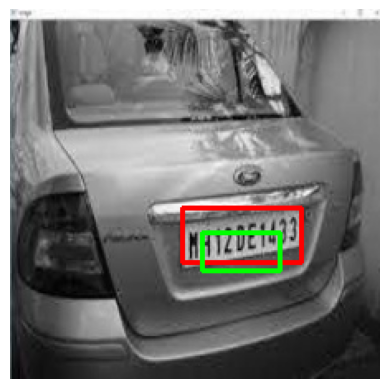

In [181]:
i = 63


pred = car_detect(data[i:i+1]/255)
print(pred/100)

path = "datasets/easy/images/resize/N" + str(i+1) + ".jpg"
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

coords = target[i]# get_rect_coords("datasets/easy/yolo/N" + str(i) + ".txt")
height, width = img.shape[:2]


x_center = float(coords[0])
y_center = float(coords[1])
x_w = float(coords[2])
y_h = float(coords[3])
cv.rectangle(img, (int((x_center - x_w / 2)*width), int((y_center - y_h / 2)*height)),
                  (int((x_center + x_w / 2)*width), int((y_center + y_h / 2)*height)), (255, 0, 0), 2)

x_center = float(pred[0][0])/100
y_center = float(pred[0][1])/100
x_w = float(pred[0][2])/100
y_h = float(pred[0][3])/100
cv.rectangle(img, (int((x_center - x_w / 2)*width), int((y_center - y_h / 2)*height)),
                  (int((x_center + x_w / 2)*width), int((y_center + y_h / 2)*height)), (0, 255, 0), 2)
plt.axis("off")
plt.imshow(img)
plt.show()

In [179]:
!nvidia-smi

Mon Oct 24 18:41:33 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.85.02    Driver Version: 510.85.02    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   75C    P0    22W /  N/A |   1507MiB /  4096MiB |     73%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
# conv1 = torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=7, padding=3, stride=2)
# act1 = torch.nn.ReLU()
# pool1 = torch.nn.MaxPool2d(kernel_size=3, stride=3)

# conv2 = torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=5, padding=0, stride=1)
# act2 = torch.nn.ReLU()
# pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

# conv3 = torch.nn.Conv2d(in_channels=8, out_channels=4, kernel_size=3, padding=0, stride=1)
# act3 = torch.nn.ReLU()
# pool3 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

# input = torch.randn(1, 3, 215, 215)

# output = conv1(input)
# output = act1(output)
# output = pool1(output)

# output = conv2(output)
# output = act2(output)
# output = pool2(output)

# output = conv3(output)
# output = act3(output)
# output = pool3(output)

# print(output.shape)

torch.Size([1, 4, 7, 7])


In [65]:
torch.cuda.is_available()

True